### Imports

In [1]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns

from tsfresh import extract_features

### Data ingest and prep1

In [2]:
data_path = './data_in/'

data_train = 'exoTrain.csv'
data_test = 'exoTest.csv'

In [3]:
df_train = pd.read_csv(data_path + data_train)
df_test = pd.read_csv(data_path + data_test)

df = pd.concat([df_train, df_test])
df = df.reset_index(drop=True)
df = df.reset_index()

print(df_train.shape, df_test.shape, df.shape)
display(df.head(3))
display(df.tail(3))

(5087, 3198) (570, 3198) (5657, 3199)


,index,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67


,index,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
5654,5654,1,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
5655,5655,1,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60
5656,5656,1,3071.19,2782.53,2608.69,2325.47,2089.37,1769.56,1421.09,1142.09,...,695.41,865.97,882.41,1203.06,1293.03,1354.41,-192.81,-277.22,-69.63,121.56


In [4]:
df['LABEL'].value_counts()

1    5615
2      42
Name: LABEL, dtype: int64

In [5]:
#df_forLabs = df.drop('LABEL', axis=1)
#df_forLabs = df_forLabs.drop('index', axis=1)
#df_forLabs.head(3)

df_y_orig = df[['LABEL']]
df_X_orig = df.drop('LABEL', axis=1)
df_X_orig = df_X_orig.drop('index', axis=1)

display(df_X_orig.head(3))
display(df_y_orig.head(3))
print(df_X_orig.shape, df_y_orig.shape)

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67


,LABEL
0,2
1,2
2,2


(5657, 3197) (5657, 1)


In [ ]:
#df_y_orig.to_csv('df_y_all.csv', index=False)

In [6]:
df_melted = pd.melt(df,
                    id_vars = ['index', 'LABEL'],
                    #value_vars = df_forLabs.columns, 
                    value_vars = df_X_orig.columns, 
                    var_name = 'flux',
                    value_name = 'val'
                   )

print(df_melted.shape)
display(df_melted.head(3))
display(df_melted.tail(3))

(18085429, 4)


,index,LABEL,flux,val
0,0,2,FLUX.1,93.85
1,1,2,FLUX.1,-38.88
2,2,2,FLUX.1,532.64


,index,LABEL,flux,val
18085426,5654,1,FLUX.3197,18.70
18085427,5655,1,FLUX.3197,17.60
18085428,5656,1,FLUX.3197,121.56


### Viz1

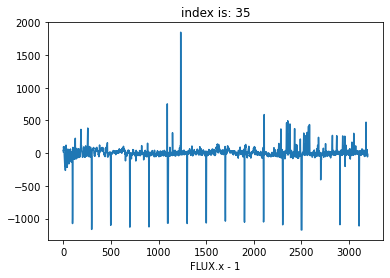

In [7]:
index_viz = 35
df_viz1 = df_melted[df_melted['index'] == index_viz]
df_viz1 = df_viz1.reset_index(drop=True)
df_viz1['val'].plot()
plt.xlabel('FLUX.x - 1')
plt.title('index is: ' + str(index_viz));

In [8]:
print(df_viz1.shape)
df_viz1

(3197, 4)


,index,LABEL,flux,val
0,35,2,FLUX.1,22.82
1,35,2,FLUX.2,46.37
2,35,2,FLUX.3,39.61
3,35,2,FLUX.4,98.75
4,35,2,FLUX.5,81.32
...,...,...,...,...
3192,35,2,FLUX.3193,-5.38
3193,35,2,FLUX.3194,-24.46
3194,35,2,FLUX.3195,-55.86
3195,35,2,FLUX.3196,-44.55


### Extract features

In [9]:
# remove unwanted from df_melted

print(df_melted.shape)
display(df_melted.head(2))

df_melted = df_melted[['index', 'flux', 'val']]
df_melted.head(3)

print(df_melted.shape)
display(df_melted.head(2))
display(df_melted.tail(2))

(18085429, 4)


,index,LABEL,flux,val
0,0,2,FLUX.1,93.85
1,1,2,FLUX.1,-38.88


(18085429, 3)


,index,flux,val
0,0,FLUX.1,93.85
1,1,FLUX.1,-38.88


,index,flux,val
18085427,5655,FLUX.3197,17.60
18085428,5656,FLUX.3197,121.56


In [ ]:
# downselect seqs used if needed

## df_melted[df_melted['index'] == 100]

## df_3 = df_melted[(df_melted['index'] == 0) |
#                 (df_melted['index'] == 1) |
#                 (df_melted['index'] == 2)
#                ]

In [ ]:
## extracted_features = extract_features(timeseries, column_id="id", column_sort="time")
## extracted_features = extract_features(df_3b, column_id="index", column_sort="flux")

extracted_features = extract_features(df_melted, column_id="index", column_sort="flux")

#extracted_features.to_csv('extracted_features1.csv', index=False)
#extracted_features.to_csv('extracted_features_allExoPlKgglRows.csv', index=False)
extracted_features.to_csv('extracted_features_kgglExplanets_3apr2022a.csv', index=False)

### Prep extracted features

In [10]:
import pandas as pd

In [11]:
feature_file = 'extracted_features_kgglExplanets_3apr2022a.csv'
df_feat = pd.read_csv('./data_out/' + feature_file)

print(df_feat.shape)
display(df_feat.head(2))
display(df_feat.tail(2))

(5657, 789)


,val__variance_larger_than_standard_deviation,val__has_duplicate_max,val__has_duplicate_min,val__has_duplicate,val__sum_values,val__abs_energy,val__mean_abs_change,val__mean_change,val__mean_second_derivative_central,val__median,...,val__permutation_entropy__dimension_6__tau_1,val__permutation_entropy__dimension_7__tau_1,val__query_similarity_count__query_None__threshold_0.0,"val__matrix_profile__feature_""min""__threshold_0.98","val__matrix_profile__feature_""max""__threshold_0.98","val__matrix_profile__feature_""mean""__threshold_0.98","val__matrix_profile__feature_""median""__threshold_0.98","val__matrix_profile__feature_""25""__threshold_0.98","val__matrix_profile__feature_""75""__threshold_0.98",val__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,31822.48,8.288109e+07,80.184922,-0.025585,0.036357,-0.01,...,6.162954,7.336597,NaN,0.793718,3.053325,1.823097,1.806146,1.515797,2.110792,630.020000
1,1.0,0.0,0.0,1.0,-23747.10,1.168622e+07,27.415213,-0.001502,0.008540,0.01,...,6.270167,7.462679,NaN,1.138149,5.856845,3.955604,4.200813,3.502861,4.602579,332.218571


,val__variance_larger_than_standard_deviation,val__has_duplicate_max,val__has_duplicate_min,val__has_duplicate,val__sum_values,val__abs_energy,val__mean_abs_change,val__mean_change,val__mean_second_derivative_central,val__median,...,val__permutation_entropy__dimension_6__tau_1,val__permutation_entropy__dimension_7__tau_1,val__query_similarity_count__query_None__threshold_0.0,"val__matrix_profile__feature_""min""__threshold_0.98","val__matrix_profile__feature_""max""__threshold_0.98","val__matrix_profile__feature_""mean""__threshold_0.98","val__matrix_profile__feature_""median""__threshold_0.98","val__matrix_profile__feature_""25""__threshold_0.98","val__matrix_profile__feature_""75""__threshold_0.98",val__mean_n_absolute_max__number_of_maxima_7
5655,1.0,0.0,1.0,1.0,-40530.77,1.237888e+08,51.028176,-0.041361,0.011146,0.0,...,6.383042,7.583277,NaN,1.866913,9.800562,8.052886,8.429273,7.664476,9.021143,3414.242857
5656,1.0,1.0,0.0,1.0,55307.45,2.077437e+09,255.535247,-0.937168,0.343804,0.0,...,6.129921,7.307311,NaN,1.540042,6.051461,3.913323,3.988464,3.340219,4.583979,10062.921429


In [12]:
df_y = pd.read_csv('./data_out/df_y_all.csv')
print(df_y.shape)
display(df_y.head(2))
display(df_y.tail(2))

(5657, 1)


,LABEL
0,2
1,2


,LABEL
5655,1
5656,1


In [13]:
df_Xy = df_feat.copy()
print(df_Xy.shape)
df_Xy['Label'] = df_y['LABEL']
print(df_Xy.shape)

(5657, 789)
(5657, 790)


In [ ]:
#df_Xy.to_csv('df_Xy_all.csv', index=False)

### Prepare ML data

In [14]:
import pandas as pd

In [15]:
df_Xy = pd.read_csv('./data_out/df_Xy_all.csv')

print(df_Xy.shape)
display(df_Xy.head(2))
display(df_Xy.tail(2))

(5657, 790)


,val__variance_larger_than_standard_deviation,val__has_duplicate_max,val__has_duplicate_min,val__has_duplicate,val__sum_values,val__abs_energy,val__mean_abs_change,val__mean_change,val__mean_second_derivative_central,val__median,...,val__permutation_entropy__dimension_7__tau_1,val__query_similarity_count__query_None__threshold_0.0,"val__matrix_profile__feature_""min""__threshold_0.98","val__matrix_profile__feature_""max""__threshold_0.98","val__matrix_profile__feature_""mean""__threshold_0.98","val__matrix_profile__feature_""median""__threshold_0.98","val__matrix_profile__feature_""25""__threshold_0.98","val__matrix_profile__feature_""75""__threshold_0.98",val__mean_n_absolute_max__number_of_maxima_7,Label
0,1.0,0.0,0.0,1.0,31822.48,8.288109e+07,80.184922,-0.025585,0.036357,-0.01,...,7.336597,NaN,0.793718,3.053325,1.823097,1.806146,1.515797,2.110792,630.020000,2
1,1.0,0.0,0.0,1.0,-23747.10,1.168622e+07,27.415213,-0.001502,0.008540,0.01,...,7.462679,NaN,1.138149,5.856845,3.955604,4.200813,3.502861,4.602579,332.218571,2


,val__variance_larger_than_standard_deviation,val__has_duplicate_max,val__has_duplicate_min,val__has_duplicate,val__sum_values,val__abs_energy,val__mean_abs_change,val__mean_change,val__mean_second_derivative_central,val__median,...,val__permutation_entropy__dimension_7__tau_1,val__query_similarity_count__query_None__threshold_0.0,"val__matrix_profile__feature_""min""__threshold_0.98","val__matrix_profile__feature_""max""__threshold_0.98","val__matrix_profile__feature_""mean""__threshold_0.98","val__matrix_profile__feature_""median""__threshold_0.98","val__matrix_profile__feature_""25""__threshold_0.98","val__matrix_profile__feature_""75""__threshold_0.98",val__mean_n_absolute_max__number_of_maxima_7,Label
5655,1.0,0.0,1.0,1.0,-40530.77,1.237888e+08,51.028176,-0.041361,0.011146,0.0,...,7.583277,NaN,1.866913,9.800562,8.052886,8.429273,7.664476,9.021143,3414.242857,1
5656,1.0,1.0,0.0,1.0,55307.45,2.077437e+09,255.535247,-0.937168,0.343804,0.0,...,7.307311,NaN,1.540042,6.051461,3.913323,3.988464,3.340219,4.583979,10062.921429,1


In [16]:
df_Xy['Label'].value_counts()

#1    5615
#2      42

1    5615
2      42
Name: Label, dtype: int64

### Warmup with Creating Approximately Balanced Dataset

In [17]:
df_Xy_1 = df_Xy[df_Xy['Label'] == 1]
df_Xy_2 = df_Xy[df_Xy['Label'] == 2]
print(df_Xy_1.shape, df_Xy_2.shape)

(5615, 790) (42, 790)


In [18]:
df_Xy_1_100 = df_Xy_1.head(100)

In [19]:
df_Xy_100_42 = pd.concat([df_Xy_1_100, df_Xy_2])
print(df_Xy_100_42.shape)

(142, 790)


In [20]:
df_y = df_Xy_100_42[['Label']]
df_X = df_Xy_100_42.drop('Label', axis=1)
#df_X['Label'] # check that this errors out

In [21]:
X = df_X.values
y = df_y.values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                                    test_size=test_size, 
                                                                    stratify=y) # random_state=1

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(113, 789) (29, 789) (113, 1) (29, 1)


In [24]:
import numpy as np

In [25]:
print(np.count_nonzero(y_train==1))
print(np.count_nonzero(y_train==2))

80
33


### Baseline XGBoost Classifier

In [28]:
import xgboost as xgb

In [29]:
clf = xgb.XGBClassifier()

In [31]:
clf.fit(X_train, y_train)

[02:03:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred = clf.predict(X_test)

In [33]:
# ML model evaluation
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [34]:
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('precision: ' + str(precision_score(y_test, y_pred)))
print('recall: ' + str(recall_score(y_test, y_pred)))
print('f1: ' + str(f1_score(y_test, y_pred)))
print('roc_auc: ' + str(roc_auc_score(y_test, y_pred)))
confusion_matrix(y_test, y_pred)

accuracy: 0.9310344827586207
precision: 0.9090909090909091
recall: 1.0
f1: 0.9523809523809523
roc_auc: 0.8888888888888888


array([[20,  0],
       [ 2,  7]], dtype=int64)

In [35]:
print(np.count_nonzero(y_test==1))
print(np.count_nonzero(y_test==2))

20
9


### Interpretation and Feature Importance